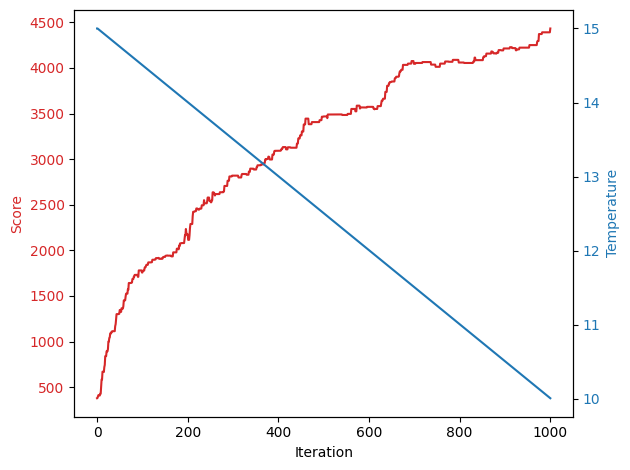

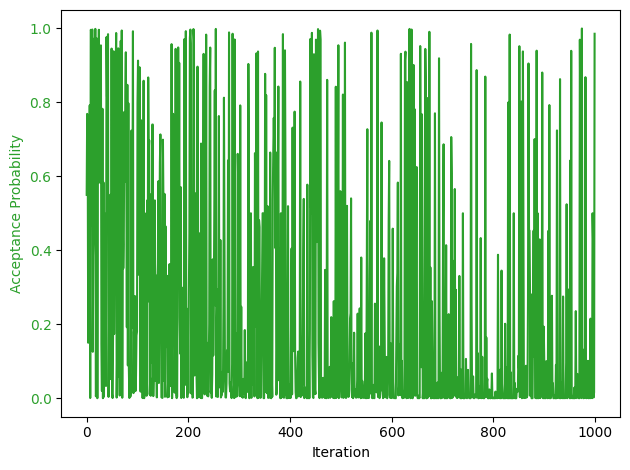

Initial score: 379
Final score: 4432
Table 1: [98, 103, 158, 235, 271]
Table 2: [69, 190, 213, 254, 256]
Table 3: [38, 149, 232, 265, 266]
Table 4: [1, 34, 77, 172, 275]
Table 5: [56, 58, 131, 222, 280]
Table 6: [6, 70, 139, 163, 224]
Table 7: [30, 71, 123, 155, 200]
Table 8: [3, 144, 150, 154, 187]
Table 9: [101, 182, 186, 231, 264]
Table 10: [22, 41, 125, 195, 230]
Table 11: [67, 137, 267, 286, 296]
Table 12: [88, 164, 209, 216, 290]
Table 13: [81, 87, 133, 193, 210]
Table 14: [5, 96, 204, 212, 225]
Table 15: [2, 79, 132, 219, 283]
Table 16: [12, 13, 47, 83, 175]
Table 17: [178, 192, 207, 229, 237]
Table 18: [11, 64, 118, 221, 255]
Table 19: [63, 99, 138, 259, 294]
Table 20: [59, 141, 147, 198, 258]
Table 21: [29, 55, 112, 121, 234]
Table 22: [153, 197, 202, 241, 270]
Table 23: [7, 16, 28, 53, 152]
Table 24: [51, 113, 128, 243, 292]
Table 25: [162, 167, 191, 211, 239]
Table 26: [0, 114, 173, 223, 228]
Table 27: [109, 115, 263, 279, 293]
Table 28: [146, 179, 249, 287, 297]
Table 29: [

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of guests and tables
NUM_GUESTS = 300
NUM_TABLES = 60
TABLE_SIZE = 5

# Define the guest interest scores
GUEST_SCORES = np.random.randint(-20, 21, size=(NUM_GUESTS, NUM_GUESTS))

# Make scores symmetric
for i in range(NUM_GUESTS):
    for j in range(i + 1, NUM_GUESTS):
        GUEST_SCORES[j, i] = GUEST_SCORES[i, j]

# Set diagonal elements to zero
np.fill_diagonal(GUEST_SCORES, 0)

# Define the initial state
def random_seating_plan():
    seating_plan = np.zeros(NUM_GUESTS, dtype=int)
    for i in range(NUM_TABLES):
        table_indices = np.arange(i * TABLE_SIZE, (i + 1) * TABLE_SIZE)
        seating_plan[table_indices] = i
    np.random.shuffle(seating_plan)
    return seating_plan


# Define the objective function
def same_table(guest1, guest2, seating_plan):
    return seating_plan[guest1] == seating_plan[guest2]

def seating_score(seating_plan):
    score = 0
    for i in range(NUM_GUESTS):
        for j in range(i + 1, NUM_GUESTS):
            if same_table(i, j, seating_plan):
                score += GUEST_SCORES[i, j]
    return score


# Define the simulated annealing algorithm with sigmoid function and higher delta score means better new state
def simulated_annealing_delta(objective_function, initial_state, temperature_schedule, max_iterations):
    current_state = initial_state
    current_score = objective_function(current_state)
    scores = [current_score]
    temperatures = [temperature_schedule(0)]
    acceptance_probs = []

    for i in range(max_iterations):
        temperature = temperature_schedule(i)
        new_state = current_state.copy()
        swap_indices = np.random.choice(NUM_GUESTS, size=2, replace=False)
        new_state[swap_indices[0]], new_state[swap_indices[1]] = new_state[swap_indices[1]], new_state[swap_indices[0]]
        new_score = objective_function(new_state)
        delta_score = current_score - new_score

        # Calculate the acceptance probability using sigmoid function
        acceptance_prob = 1 / (1 + np.exp(delta_score / temperature))

        if acceptance_prob > np.random.uniform():
            current_state = new_state
            current_score = new_score

        scores.append(current_score)
        temperatures.append(temperature)
        acceptance_probs.append(acceptance_prob)

    return current_state, current_score, scores, temperatures, acceptance_probs


# Define the temperature schedule
max_iterations = 1000
def temperature_schedule(iteration):
    return 15.0 - (5.0 * iteration) / max_iterations


# Run simulated annealing
initial_state = random_seating_plan()
final_state, final_score, scores, temperatures, acceptance_probs = simulated_annealing_delta(seating_score, initial_state, temperature_schedule, max_iterations)

# Create separate subplots for scores, temperatures, and acceptance probabilities
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Score', color=color)
ax1.plot(scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(temperatures, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

fig, ax3 = plt.subplots()

color = 'tab:green'
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Acceptance Probability', color=color)
ax3.plot(acceptance_probs, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()

# Print the results
#print("Possible solutions: ", (NUM_TABLES ** NUM_GUESTS) // (TABLE_SIZE ** NUM_TABLES))
print("Initial score:", seating_score(initial_state))
print("Final score:", final_score)

# Output final seating plan by table number and guests
final_seating_by_table = [[] for _ in range(NUM_TABLES)]
for guest, table in enumerate(final_state):
    final_seating_by_table[table].append(guest)

for table, guests in enumerate(final_seating_by_table):
    print(f"Table {table+1}: {guests}")